In [1]:
%pylab inline
import scipy.stats as stats
import pandas as pd
import seaborn as sns

sns.set_style('white')
sns.set_context("talk")

rcParams['font.size']=12
rcParams['pdf.fonttype']=42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
import glob
import networkx as nx
from IPython.display import Image
from adjustText import adjust_text
import statsmodels.stats.multitest

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Eiru Kim <rooeikim@gmail.com>

In [3]:
# define color map yellow white blue
import matplotlib.colors as mcolors


def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)


c = mcolors.ColorConverter().to_rgb
ywb = make_colormap(
    [c('blue'), c('white'),0.5,c('white'),c('yellow')])


In [4]:
# quantile normalization
def quantileNormalize(df_input):
    df = df_input.copy()
    #compute rank
    dic = {}
    for col in df:
        dic[col] = df[col].sort_values(na_position='first').values
    sorted_df = pd.DataFrame(dic)
    #rank = sorted_df.mean(axis = 1).tolist()
    rank = sorted_df.median(axis = 1).tolist()
    #sort
    for col in df:
        # compute percentile rank [0,1] for each score in column 
        t = df[col].rank( pct=True, method='max' ).values
        # replace percentile values in column with quantile normalized score
        # retrieve q_norm score using calling rank with percentile value
        df[col] = [ np.nanpercentile( rank, i*100 ) if ~np.isnan(i) else np.nan for i in t ]
    return df

# run DrugZ for WT, Fitm2 KO, Atg12 KO cells

In [5]:
!./drugz_v1_python3.py -h

/usr/bin/sh: ./drugz_v1_python3.py: No such file or directory


### ctrl(WT)

In [6]:
# ctrl
!head -1 MUS003_Renca-HA_mTKO-20181003-readcounts.txt

CHROMOSOME	START	STOP	STRAND	SEQUENCE	GENE	MUS_15	MUS_31	MUS_32	MUS_33	MUS_25	MUS_26	MUS_27	MUS_28	MUS_29	MUS_153	MUS_16	MUS_17	MUS_18	MUS_19	MUS_20	MUS_21	MUS_22	MUS_23	MUS_24


In [7]:
# run drugz
# WT
! cut -f 5- MUS003_Renca-HA_mTKO-20181003-readcounts.txt > MUS003_Renca-HA_mTKO-20181003-readcounts.cut.txt
# Midpoint  T15 (ctrl), T16(T cell)
!python3 -W ignore drugz_v1.py -i MUS003_Renca-HA_mTKO-20181003-readcounts.cut.txt -n mNEG0.txt -c MUS_25,MUS_26,MUS_27 -x MUS_28,MUS_29,MUS_153 -o drugz_MUS003_Renca_mid
# Endpoint  T24 (ctrl), T22(T cell)
!python3 -W ignore drugz_v1.py -i MUS003_Renca-HA_mTKO-20181003-readcounts.cut.txt -n mNEG0.txt -c MUS_19,MUS_20,MUS_21 -x MUS_16,MUS_17,MUS_18 -o drugz_MUS003_Renca_end

Control samples:  ['MUS_25', 'MUS_26', 'MUS_27']
Treated samples:  ['MUS_28', 'MUS_29', 'MUS_153']
Normalizing read counts
Caculating fold change
Caculating Zscores
Combining drugZ scores
Writing output file
Control samples:  ['MUS_19', 'MUS_20', 'MUS_21']
Treated samples:  ['MUS_16', 'MUS_17', 'MUS_18']
Normalizing read counts
Caculating fold change
Caculating Zscores
Combining drugZ scores
Writing output file


### Fitm2 KO

In [8]:
!head -1 MGIN008_Renca-HA_Fitm2_-_20191212_-_readcounts.txt

CHROMOSOME	START	STOP	STRAND	SEQUENCE	GENE	MGIN_82	MGIN_83	MGIN_84	MGIN_85	MGIN_86	MGIN_87	MGIN_88


In [9]:
# run drugz
# Fitm2
! cut -f 5- MGIN008_Renca-HA_Fitm2_-_20191212_-_readcounts.txt > MGIN008_Renca-HA_Fitm2_-_20191212_-_readcounts.cut.txt
# Midpoint T18
!python3 -W ignore drugz_v1.py -i MGIN008_Renca-HA_Fitm2_-_20191212_-_readcounts.cut.txt -n mNEG0.txt -c MGIN_83,MGIN_84,MGIN_85 -x MGIN_86,MGIN_87,MGIN_88 -o drugz_MGIN008_Fitm2_mid
'''
# Endpoint T21 (ctrl), T22 (Tcell)
!python3 -W ignore drugz_v1.py -i MGIN008_Renca-HA_Fitm2_-_20191212_-_readcounts.cut.txt -n mNEG0.txt -c MGIN_5,MGIN_6,MGIN_7 -x MGIN_14,MGIN_15,MGIN_16 -o drugz_MGIN001_Pphln1_end
'''


Control samples:  ['MGIN_83', 'MGIN_84', 'MGIN_85']
Treated samples:  ['MGIN_86', 'MGIN_87', 'MGIN_88']
Normalizing read counts
Caculating fold change
Caculating Zscores
Combining drugZ scores
Writing output file


'\n# Endpoint T21 (ctrl), T22 (Tcell)\n!python3 -W ignore drugz_v1.py -i MGIN008_Renca-HA_Fitm2_-_20191212_-_readcounts.cut.txt -n mNEG0.txt -c MGIN_5,MGIN_6,MGIN_7 -x MGIN_14,MGIN_15,MGIN_16 -o drugz_MGIN001_Pphln1_end\n'

In [10]:
! head drugz_MGIN008_Fitm2_mid

GENE	sumZ	numObs	normZ	pval_synth	rank_synth	fdr_synth	pval_supp	rank_supp	fdr_supp
Atg12	-75.93	15	-15.05	1.67e-51	1	3.15e-47	1	18872	1
Atg3	-59.07	15	-11.72	5.31e-32	2	5.01e-28	1	18871	1
Atg9a	-53.91	13	-11.49	7.76e-31	3	4.88e-27	1	18870	1
Trim32	-35.92	7	-10.43	8.76e-26	4	4.13e-22	1	18869	1
Atg5	-50.21	14	-10.31	3.12e-25	5	1.18e-21	1	18868	1
Atg7	-31.97	6	-10.03	5.55e-24	6	1.74e-20	1	18867	1
Alg5	-48.34	15	-9.59	4.25e-22	7	1.14e-18	1	18866	1
H2-T23	-46.57	14	-9.57	5.55e-22	8	1.31e-18	1	18865	1
Alg8	-47.43	15	-9.41	2.4e-21	9	5.03e-18	1	18864	1


### Atg12 KO

In [11]:
!head -1 MGIN009_Renca-HA_Atg12_-_20200113_-_readcounts.txt

CHROMOSOME	START	STOP	STRAND	SEQUENCE	GENE	MGIN_89	MGIN_90	MGIN_91	MGIN_92	MGIN_96	MGIN_97	MGIN_98	MGIN_93	MGIN_94	MGIN_95	MGIN_99	MGIN_100	MGIN_101


In [12]:
# run drugz
# Fitm2
! cut -f 5- MGIN009_Renca-HA_Atg12_-_20200113_-_readcounts.txt > MGIN009_Renca-HA_Atg12_-_20200113_-_readcounts.cut.txt
# Midpoint T15
!python3 -W ignore drugz_v1.py -i MGIN009_Renca-HA_Atg12_-_20200113_-_readcounts.cut.txt -n mNEG0.txt -c MGIN_90,MGIN_91,MGIN_92 -x MGIN_96,MGIN_97,MGIN_98 -o drugz_MGIN009_Atg12_mid

# Endpoint T21 
!python3 -W ignore drugz_v1.py -i MGIN009_Renca-HA_Atg12_-_20200113_-_readcounts.cut.txt -n mNEG0.txt -c MGIN_93,MGIN_94,MGIN_95 -x MGIN_99,MGIN_100,MGIN_101 -o drugz_MGIN009_Atg12_end



Control samples:  ['MGIN_90', 'MGIN_91', 'MGIN_92']
Treated samples:  ['MGIN_96', 'MGIN_97', 'MGIN_98']
Normalizing read counts
Caculating fold change
Caculating Zscores
Combining drugZ scores
Writing output file
Control samples:  ['MGIN_93', 'MGIN_94', 'MGIN_95']
Treated samples:  ['MGIN_99', 'MGIN_100', 'MGIN_101']
Normalizing read counts
Caculating fold change
Caculating Zscores
Combining drugZ scores
Writing output file


# run DrugZ for IFN-gamma data

In [13]:
! head -1 MUS017_Renca_Cas9_Cytokines_-_20200309_-_readcounts.txt
! head -1 MGIN006_Renca_Fitm2_-_20190619_-_readcounts.txt

CHROMOSOME	START	STOP	STRAND	SEQUENCE	GENE	MUS_232	MUS_233	MUS_234	MUS_235	MUS_239	MUS_240	MUS_241	MUS_236	MUS_237	MUS_238	MUS_242	MUS_243	MUS_244
CHROMOSOME	START	STOP	STRAND	SEQUENCE	GENE	MGIN_56	MGIN_63	MGIN_64	MGIN_65	MGIN_57	MGIN_58	MGIN_59	MGIN_60	MGIN_61	MGIN_62	MGIN_66	MGIN_67	MGIN_68


In [14]:
# run drugz
# WT
! cut -f 5- MUS017_Renca_Cas9_Cytokines_-_20200309_-_readcounts.txt > MUS017_Renca_Cas9_Cytokines_-_20200309_-_readcounts.cut.txt
# Midpoint  T12 (ctrl), T12(IFN-gamma)
!python3 -W ignore drugz_v1.py -i MUS017_Renca_Cas9_Cytokines_-_20200309_-_readcounts.cut.txt -n mNEG0.txt -c MUS_233,MUS_234,MUS_235 -x MUS_239,MUS_240,MUS_241 -o drugz_MUS017_Renca_IFN_mid
# Endpoint  T18 (ctrl), T18(IFN-gamma)
!python3 -W ignore drugz_v1.py -i MUS017_Renca_Cas9_Cytokines_-_20200309_-_readcounts.cut.txt -n mNEG0.txt -c MUS_236,MUS_237,MUS_238 -x MUS_242,MUS_243,MUS_244 -o drugz_MUS017_Renca_IFN_end

Control samples:  ['MUS_233', 'MUS_234', 'MUS_235']
Treated samples:  ['MUS_239', 'MUS_240', 'MUS_241']
Normalizing read counts
Caculating fold change
Caculating Zscores
Combining drugZ scores
Writing output file
Control samples:  ['MUS_236', 'MUS_237', 'MUS_238']
Treated samples:  ['MUS_242', 'MUS_243', 'MUS_244']
Normalizing read counts
Caculating fold change
Caculating Zscores
Combining drugZ scores
Writing output file


In [15]:
# run drugz
# Fitm2 KO
# MGIN_57,MGIN_58,MGIN_59   MGIN_63,MGIN_64,MGIN_65
# MGIN_60,MGIN_61,MGIN_62   MGIN_66,MGIN_67,MGIN_68
! cut -f 5- MGIN006_Renca_Fitm2_-_20190619_-_readcounts.txt > MGIN006_Renca_Fitm2_-_20190619_-_readcounts.cut.txt
# Midpoint  
!python3 -W ignore drugz_v1.py -i MGIN006_Renca_Fitm2_-_20190619_-_readcounts.cut.txt -n mNEG0.txt -c MGIN_57,MGIN_58,MGIN_59 -x MGIN_63,MGIN_64,MGIN_65 -o drugz_MGIN006_Renca_Fitm2_IFN_mid
# Endpoint 
!python3 -W ignore drugz_v1.py -i MGIN006_Renca_Fitm2_-_20190619_-_readcounts.cut.txt -n mNEG0.txt -c MGIN_60,MGIN_61,MGIN_62 -x MGIN_66,MGIN_67,MGIN_68 -o drugz_MGIN006_Renca_Fitm2_IFN_end

Control samples:  ['MGIN_57', 'MGIN_58', 'MGIN_59']
Treated samples:  ['MGIN_63', 'MGIN_64', 'MGIN_65']
Normalizing read counts
Caculating fold change
Caculating Zscores
Combining drugZ scores
Writing output file
Control samples:  ['MGIN_60', 'MGIN_61', 'MGIN_62']
Treated samples:  ['MGIN_66', 'MGIN_67', 'MGIN_68']
Normalizing read counts
Caculating fold change
Caculating Zscores
Combining drugZ scores
Writing output file


# run DrugZ for Atg12 TNFalpha

In [16]:
a = pd.read_excel("MUS017_Renca_Cas9_Cytokines_TNF_-_20200320_-_normed_readcount.xlsx")
a.dropna().drop(columns="GENE_CLONE").to_csv("MUS017_Renca_Cas9_Cytokines_TNF_-_20200320_-_normed_readcount.tsv",sep="\t")

In [17]:
!head -1 "MUS017_Renca_Cas9_Cytokines_TNF_-_20200320_-_normed_readcount.tsv"

	Unnamed: 0	GENE	MUS_232	MUS_233	MUS_234	MUS_235	MUS_245	MUS_246	MUS_247	MUS_236	MUS_237	MUS_238	MUS_248	MUS_249	MUS_250


In [18]:
# run drugz
# WT
#! cut -f 5- MUS017_Renca_Cas9_Cytokines_-_20200320_-_readcounts.txt > MUS017_Renca_Cas9_Cytokines_-_20200320_-_readcounts.cut.txt
# Midpoint  T12 (ctrl), T12(T cell)
!python3 -W ignore drugz_v1.py -i MUS017_Renca_Cas9_Cytokines_TNF_-_20200320_-_normed_readcount.tsv -n mNEG0.txt -c MUS_233,MUS_234,MUS_235 -x MUS_245,MUS_246,MUS_247 -o drugz_MUS017_Renca_TNF_mid
# Endpoint  T24 (ctrl), T22(T cell)
!python3 -W ignore drugz_v1.py -i MUS017_Renca_Cas9_Cytokines_TNF_-_20200320_-_normed_readcount.tsv -n mNEG0.txt -c MUS_236,MUS_237,MUS_238 -x MUS_248,MUS_249,MUS_250 -o drugz_MUS017_Renca_TNF_end

Control samples:  ['MUS_233', 'MUS_234', 'MUS_235']
Treated samples:  ['MUS_245', 'MUS_246', 'MUS_247']
Normalizing read counts
Caculating fold change
Caculating Zscores
Combining drugZ scores
Writing output file
Control samples:  ['MUS_236', 'MUS_237', 'MUS_238']
Treated samples:  ['MUS_248', 'MUS_249', 'MUS_250']
Normalizing read counts
Caculating fold change
Caculating Zscores
Combining drugZ scores
Writing output file


In [19]:
# Atg12 KO
a = pd.read_excel("MGIN005_Renca_Atg12_-_20190619_-_normed_readcount.xlsx")
a.dropna().drop(columns="GENE_CLONE").to_csv("MGIN005_Renca_Atg12_-_20190619_-_normed_readcount.tsv",sep="\t")

In [20]:
!head -1 "MGIN005_Renca_Atg12_-_20190619_-_normed_readcount.tsv"

	Unnamed: 0	GENE	MGIN_43	MGIN_44	MGIN_45	MGIN_46	MGIN_47	MGIN_48	MGIN_49	MGIN_50	MGIN_51	MGIN_52	MGIN_53	MGIN_54	MGIN_55


In [21]:
# run drugz
# ATG12 KO
# T10

#! cut -f 5- MGIN005_Renca_Atg12_-_20190619_-_readcounts.txt > MGIN005_Renca_Atg12_-_20190619_-_readcounts.cut.txt
# Midpoint  T9 (ctrl), T10(TNF)
!python3 -W ignore drugz_v1.py -i MGIN005_Renca_Atg12_-_20190619_-_normed_readcount.tsv -n mNEG0.txt -c MGIN_44,MGIN_45,MGIN_46 -x MGIN_47,MGIN_48,MGIN_49 -o drugz_MGIN005_Renca_Atg12_TNF_mid
# Endpoint  T14 (ctrl), T14(TNF)
!python3 -W ignore drugz_v1.py -i MGIN005_Renca_Atg12_-_20190619_-_normed_readcount.tsv -n mNEG0.txt -c MGIN_50,MGIN_51,MGIN_52 -x MGIN_53,MGIN_54,MGIN_55 -o drugz_MGIN005_Renca_Atg12_TNF_end

Control samples:  ['MGIN_44', 'MGIN_45', 'MGIN_46']
Treated samples:  ['MGIN_47', 'MGIN_48', 'MGIN_49']
Normalizing read counts
Caculating fold change
Caculating Zscores
Combining drugZ scores
Writing output file
Control samples:  ['MGIN_50', 'MGIN_51', 'MGIN_52']
Treated samples:  ['MGIN_53', 'MGIN_54', 'MGIN_55']
Normalizing read counts
Caculating fold change
Caculating Zscores
Combining drugZ scores
Writing output file


# read drugZ data

In [22]:
# read normz reads


wt_CTL_mid = pd.read_table("drugz_MUS003_Renca_mid",index_col=0,header=0)
Atg12_CTL_mid = pd.read_table("drugz_MGIN009_Atg12_mid",index_col=0,header=0)
Fitm2_CTL_mid = pd.read_table("drugz_MGIN008_Fitm2_mid",index_col=0,header=0) 

wt_CTL_end = pd.read_table("drugz_MUS003_Renca_end",index_col=0,header=0)
Atg12_CTL_end = pd.read_table("drugz_MGIN009_Atg12_end",index_col=0,header=0)
Fitm2_CTL_end = pd.read_table("drugz_MGIN008_Fitm2_mid",index_col=0,header=0) # one datapoint


wt_IFN_mid = pd.read_csv("drugz_MUS017_Renca_IFN_mid",index_col=0,header=0,sep="\t")
Fitm2_IFN_mid = pd.read_csv("drugz_MGIN006_Renca_Fitm2_IFN_mid",sep="\t",index_col=0,header=0)

wt_IFN_end = pd.read_csv("drugz_MUS017_Renca_IFN_end",index_col=0,header=0,sep="\t")
Fitm2_IFN_end = pd.read_csv("drugz_MGIN006_Renca_Fitm2_IFN_end",sep="\t",index_col=0,header=0)


wt_TNF_end = pd.read_csv("drugz_MUS017_Renca_TNF_end",index_col=0,header=0,sep="\t")
Atg12_TNF_end = pd.read_csv("drugz_MGIN005_Renca_Atg12_TNF_end",sep="\t",index_col=0,header=0)

wt_TNF_mid = pd.read_csv("drugz_MUS017_Renca_TNF_mid",index_col=0,header=0,sep="\t")
Atg12_TNF_mid = pd.read_csv("drugz_MGIN005_Renca_Atg12_TNF_mid",sep="\t",index_col=0,header=0)






Atg12_CTL_mid.head(3)

sumZ  numObs  normZ    pval_synth  rank_synth     fdr_synth  \
GENE                                                                  
Peli1 -50.16      15 -10.34  2.240000e-25           1  4.270000e-21   
Rab1b -49.93      15 -10.30  3.670000e-25           2  3.500000e-21   
Rela  -49.84      15 -10.28  4.490000e-25           3  2.850000e-21   

       pval_supp  rank_supp  fdr_supp  
GENE                                   
Peli1        1.0      19052       1.0  
Rab1b        1.0      19051       1.0  
Rela         1.0      19050       1.0

In [23]:
# common genes

common = wt_CTL_end.index
for s in [Atg12_CTL_end,Fitm2_CTL_end]:
    common = intersect1d(common,s.index)
    
len(common)

18796

# Calculate Genetic interaction

In [24]:
result_tables = dict() # data storage

def calc_gi_zscore_dataframe(dataframe,g,wt='WT'):
    dataframe_copy = dataframe.copy().dropna()
    
    # Differnce of normZ score
    dataframe_copy['diff'] = (dataframe_copy[g] - dataframe_copy[wt])
    
    # Z-transformation
    dataframe_copy['z'] = (dataframe_copy['diff'] - dataframe_copy['diff'].mean())/dataframe_copy['diff'].std()
    dataframe_copy['pvalue'] = pd.Series(index = dataframe_copy.index,data=stats.norm.sf(abs(dataframe_copy['z']))*2)
    
    #Benjamini-Hochberg correction for calculating FDR
    dataframe_copy = dataframe_copy.sort_values('pvalue') # presorted
    bh =  statsmodels.stats.multitest.multipletests(dataframe_copy['pvalue'],method='fdr_bh',is_sorted=True)

    dataframe_copy['fdr'] = bh[1]
    
    return dataframe_copy


# GI - Renca Atg12 KO, Fitm2 KO CTL

In [25]:
# Quantile normalize normZ score to reduce batch effect

data = pd.DataFrame(index=common)
data['WT'] = wt_CTL_mid['normZ']
data['Atg12'] = Atg12_CTL_mid['normZ']
data['Fitm2'] = Fitm2_CTL_mid['normZ']

data_CTL_mid_qt = quantileNormalize(data)

In [26]:
# Quantile normalize normZ score to reduce batch effect

data_end = pd.DataFrame(index=common)
data_end['WT'] = wt_CTL_end['normZ']
data_end['Atg12'] = Atg12_CTL_end['normZ'] # T 18
data_end['Fitm2'] = Fitm2_CTL_mid['normZ'] # T20

data_CTL_end_qt = quantileNormalize(data_end)

In [75]:
## mid time point GI calculation
for g in ['Atg12','Fitm2']:
    # GI calculation
    result = calc_gi_zscore_dataframe(data_CTL_mid_qt,g)
    
    # save data
    result[['WT',g,'diff','z','pvalue','fdr']].sort_values("z").to_csv(f"result_table_diffGI_WTvsCTL_mid_{g}_pvalue_fdr.csv")
    
    #store data in result_tables for drawing plots
    result_tables[f'data_CTL_mid_qt_{g}'] = result[['WT',g,'diff','z','pvalue','fdr']].copy()
    
    

In [28]:
## end time point GI calculation

for g in ['Atg12','Fitm2']: 
    # GI calculation
    result = calc_gi_zscore_dataframe(data_CTL_end_qt,g)
    
    # save data
    result[['WT',g,'diff','z','pvalue','fdr']].sort_values("z").to_csv(f"result_table_diffGI_WTvsCTL_end_{g}_pvalue_fdr.csv")
    
    # store data in result_tables for drawing plots
    result_tables[f'data_CTL_end_qt_{g}'] = result[['WT',g,'diff','z','pvalue','fdr']].copy()


# GI - Fitm2 KO mid IFN 

In [29]:
data_IFN = pd.DataFrame(index=common)
data_IFN['WT'] = wt_IFN_mid['normZ']
data_IFN['Fitm2'] = Fitm2_IFN_mid['normZ']

data_IFN_qt = quantileNormalize(data_IFN)

In [30]:

for g in ['Fitm2']:
    # GI calculation
    result = calc_gi_zscore_dataframe(data_IFN_qt,g)
    
    # save data
    result[['WT',g,'diff','z','pvalue','fdr']].sort_values("z").to_csv(f"result_table_diffGI_WTvsCTL_IFN_{g}_pvalue_fdr.csv")
    
    
    # store data in result_tables for drawing plots
    result_tables[f'data_IFN_mid_qt_{g}'] = result[['WT',g,'diff','z','pvalue','fdr']].copy()
    

In [31]:
# Draw plots CTL vs IFN

temp = pd.DataFrame()
temp['CTL'] = result_tables['data_CTL_mid_qt_Fitm2']['z']
temp['IFN'] = result_tables[f'data_IFN_mid_qt_Fitm2']['z']

# Draw plot
figure(figsize=(10,10))
scatter(temp['CTL'],temp['IFN'],c='grey',alpha=0.5,edgecolors='k')
for sg in union1d(["Fitm2"],union1d(temp[['IFN','CTL']].mean(axis=1).sort_values().head(5).index,temp[['IFN','CTL']].mean(axis=1).sort_values().tail(5).index)):
    x,y=(temp.loc[sg,'CTL'],temp.loc[sg,'IFN'])
    
    addy = +1
    addx = -1
    annotate(sg,xy=(x,y),xytext =(x+addx,y+addy),arrowprops=dict(arrowstyle="-",color='k'))
xticks(size=12)
yticks(size=12)
xlabel("CTL (z, Diff GI)",size=14)
ylabel('IFN (z, Diff GI)',size=14)
title('Fitm2')
sns.despine()
temp.to_csv("table_Fitm2_CTL_vs_IFN.csv")
savefig(f"Fig_Fitm2_CTL_vs_IFN.pdf",format="pdf")
show()

# GI - Fitm2 KO end IFN 

In [32]:
# Quantile normalization

data_IFN_end = pd.DataFrame(index=common)
data_IFN_end['WT'] = wt_IFN_end['normZ']
data_IFN_end['Fitm2'] = Fitm2_IFN_end['normZ']

data_IFN_end_qt = quantileNormalize(data_IFN_end)

In [33]:
## end time point GI calculation
for g in ['Fitm2']:
    # GI calculation
    result = calc_gi_zscore_dataframe(data_IFN_end_qt,g)
    
    # save data
    result[['WT',g,'diff','z','pvalue','fdr']].sort_values("z").to_csv(f"result_table_diffGI_WTvsIFN_end_{g}_pvalue_fdr.csv")
    
    # store data in result_tables for drawing plots
    result_tables[f'data_IFN_end_qt_{g}'] = result[['WT',g,'diff','z','pvalue','fdr']].copy()
    

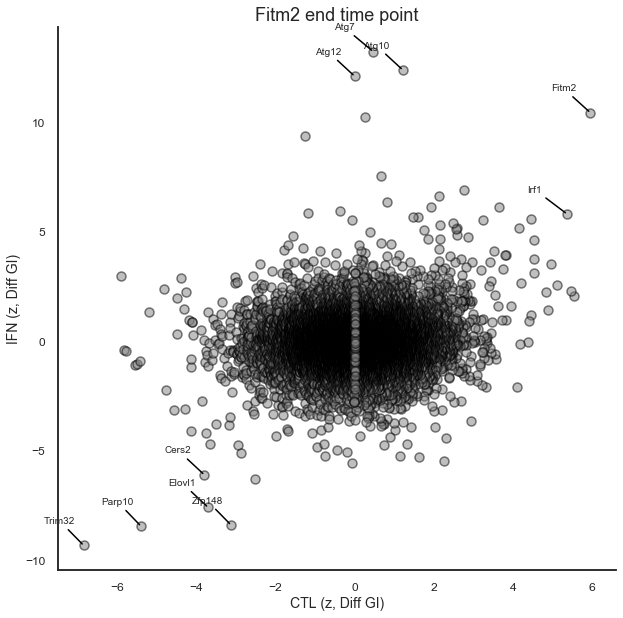

In [34]:
# Draw plots CTL vs IFN

temp = pd.DataFrame()
temp['CTL'] = result_tables['data_CTL_end_qt_Fitm2']['z'] # same as mid point
temp['IFN'] = result_tables[f'data_IFN_end_qt_Fitm2']['z']


figure(figsize=(10,10))
scatter(temp['CTL'],temp['IFN'],c='grey',alpha=0.5,edgecolors='k')
for sg in union1d(["Fitm2"],union1d(temp[['IFN','CTL']].mean(axis=1).sort_values().head(5).index,temp[['IFN','CTL']].mean(axis=1).sort_values().tail(5).index)):
    x,y=(temp.loc[sg,'CTL'],temp.loc[sg,'IFN'])
    addy = +1
    addx = -1
    annotate(sg,xy=(x,y),xytext =(x+addx,y+addy),arrowprops=dict(arrowstyle="-",color='k'))
xticks(size=12)
yticks(size=12)
xlabel("CTL (z, Diff GI)",size=14)
ylabel('IFN (z, Diff GI)',size=14)
title('Fitm2 end time point')
sns.despine()
temp.to_csv("table_Fitm2_CTL_vs_IFN_end.csv")
savefig(f"Fig_Fitm2_CTL_vs_IFN_end.pdf",format="pdf")
show()

# GI - Atg12 KO end TNF

In [35]:
data_TNF_end = pd.DataFrame(index=common)
data_TNF_end['WT'] = wt_TNF_end['normZ']
data_TNF_end['Atg12'] = Atg12_TNF_end['normZ']

data_TNF_end_qt = quantileNormalize(data_TNF_end)

In [36]:
# WT TNF vs KO TNF END (Drugz)
for g in ['Atg12']:
    # GI calculation
    result = calc_gi_zscore_dataframe(data_TNF_end_qt,g)
    
    # save data
    result[['WT',g,'diff','z','pvalue','fdr']].sort_values("z").to_csv(f"result_table_diffGI_WTvsCTL_TNF_end_{g}_pvalue_fdr.csv")
    
    # store data in result_tables for drawing plots
    result_tables[f'data_TNF_end_qt_{g}'] = result[['WT',g,'diff','z','pvalue','fdr']].copy()
    

In [37]:
data_TNF_mid = pd.DataFrame(index=common)
data_TNF_mid['WT'] = wt_TNF_mid['normZ']
data_TNF_mid['Atg12'] = Atg12_TNF_mid['normZ']

data_TNF_mid_qt = quantileNormalize(data_TNF_mid)

In [38]:
# WT TNF vs KO TNF MID (Drugz)
for g in ['Atg12']:
    # GI calculation
    result = calc_gi_zscore_dataframe(data_TNF_mid_qt,g)
    
    # save data
    result[['WT',g,'diff','z','pvalue','fdr']].sort_values("z").to_csv(f"result_table_diffGI_WTvsCTL_TNF_mid_{g}_pvalue_fdr.csv")
    
    # store data in result_tables for drawing plots
    result_tables[f'data_TNF_mid_qt_{g}'] = result[['WT',g,'diff','z','pvalue','fdr']].copy()
    

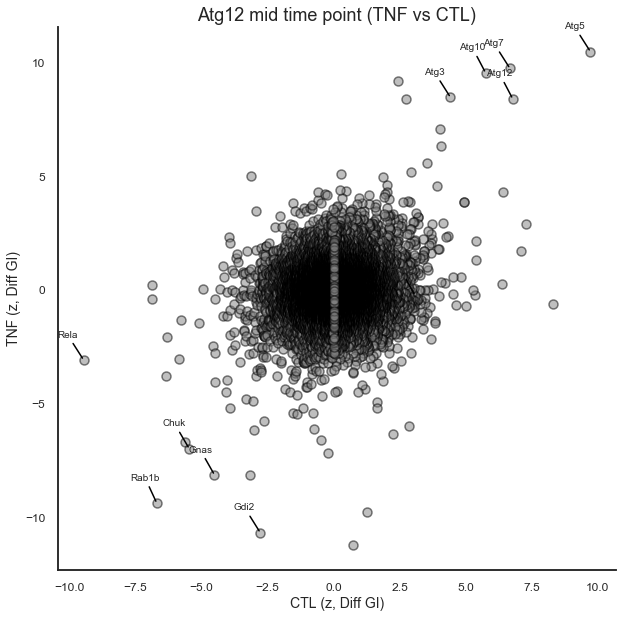

In [39]:
temp = pd.DataFrame()
temp['CTL'] = result_tables[f'data_CTL_mid_qt_Atg12']['z']
temp['TNF'] = result_tables[f'data_TNF_mid_qt_Atg12']['z']


figure(figsize=(10,10))
scatter(temp['CTL'],temp['TNF'],c='grey',alpha=0.5,edgecolors='k')
for sg in union1d(["Fitm2"],union1d(temp[['TNF','CTL']].mean(axis=1).sort_values().head(5).index,temp[['TNF','CTL']].mean(axis=1).sort_values().tail(5).index)):
    x,y=(temp.loc[sg,'CTL'],temp.loc[sg,'TNF'])
    addy = +1
    addx = -1
    annotate(sg,xy=(x,y),xytext =(x+addx,y+addy),arrowprops=dict(arrowstyle="-",color='k'))
xticks(size=12)
yticks(size=12)
xlabel("CTL (z, Diff GI)",size=14)
ylabel('TNF (z, Diff GI)',size=14)
title('Atg12 mid time point (TNF vs CTL)')
sns.despine()
temp.to_csv("table_Atg12_CTL_vs_TNF_mid.csv")
savefig(f"Fig_Atg12_CTL_vs_TNF_mid.pdf",format="pdf")
show()

### CTL TNF comparison plot with more genes

In [51]:
c1,c2 = ("data_CTL_mid_qt_Atg12","data_TNF_mid_qt_Atg12")

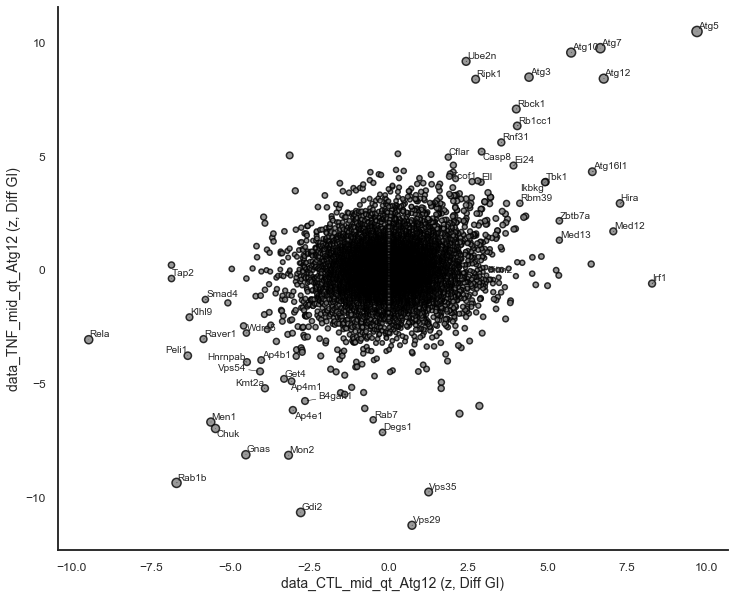

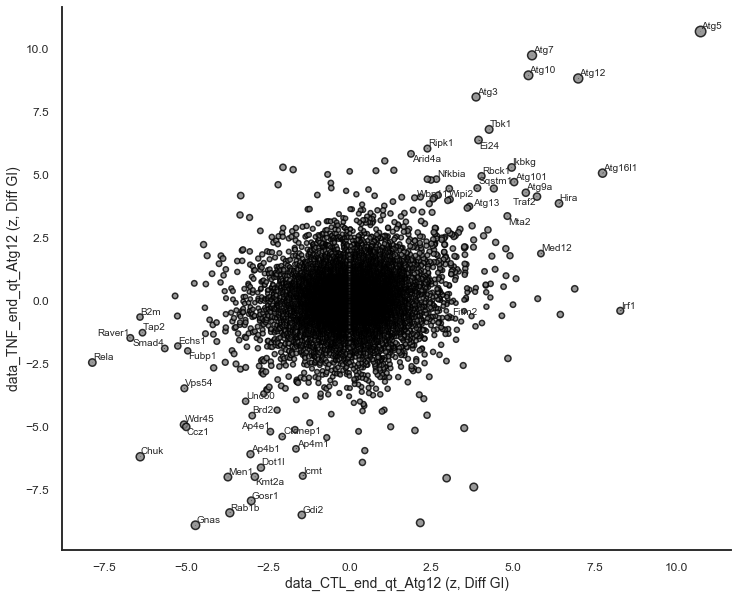

In [57]:


data_pairs = [("data_CTL_mid_qt_Atg12","data_TNF_mid_qt_Atg12"),
              ("data_CTL_end_qt_Atg12","data_TNF_end_qt_Atg12")]
              

for c1,c2 in data_pairs:
    
        temp = pd.DataFrame()
        temp['CTL'] = result_tables[c1]['z']
        temp['TNF'] = result_tables[c2]['z']
    
        #temp['TNF_color'] = data_TNF_mid_qt['temp']

        figure(figsize=(12,10))
        
        scatter(temp['CTL'],temp['TNF'],c='grey',cmap='coolwarm',
                s=abs(temp[['TNF','CTL']]).mean(axis=1)*10+3,
                #vmin=-(abs(temp['Exp_term']).max()*0.9),vmax=abs(temp['Exp_term']).max()*0.9
                
                alpha=0.8,edgecolors='k')
        
        number= 25
        texts=[]
        for sg in union1d(["Fitm2",'Atg12'],union1d(temp[['TNF','CTL']].mean(axis=1).sort_values().head(number).index,temp[['TNF','CTL']].mean(axis=1).sort_values().tail(number).index)):
            if sg in temp.index:
                x,y=(temp.loc[sg,'CTL'],temp.loc[sg,'TNF'])
                if pd.isnull(x) or pd.isnull(y):
                    continue
                addy = +1
                addx = -1
                #annotate(sg,xy=(x,y),xytext =(x+addx,y+addy),arrowprops=dict(arrowstyle="-",color='k'))
                texts.append(plt.text(x, y, sg))
            
            
        adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5),expand_text=(1.01, 1.05)) 
        
        xticks(size=12)
        yticks(size=12)
        xlabel(f"{c1} (z, Diff GI)",size=14)
        ylabel(f'{c2} (z, Diff GI)',size=14)
        
        sns.despine()
        temp.to_csv(f"table_comparison_{c1}_{c2}.csv")
        #savefig(f"Fig_{c1}_{c2}_{expkey}.pdf",format="pdf")
        show()

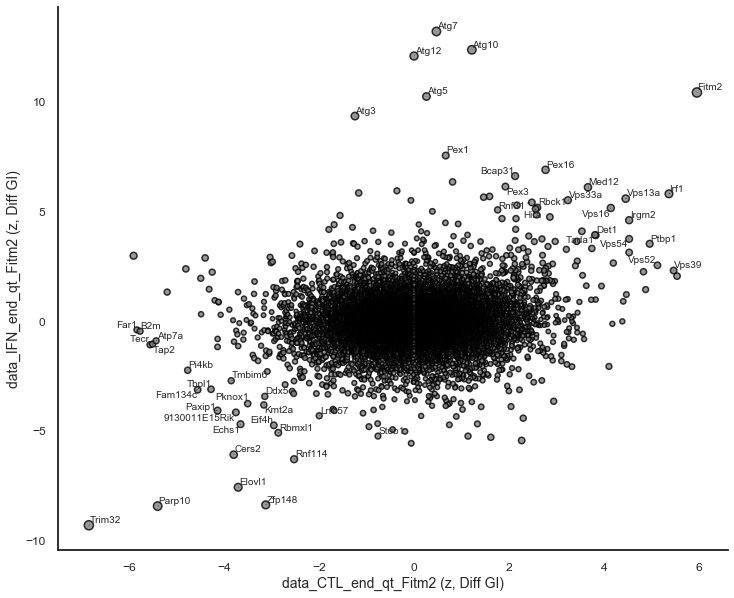

In [58]:
# endtime point

data_pairs = [("data_CTL_end_qt_Fitm2","data_IFN_end_qt_Fitm2")]
              

for c1,c2 in data_pairs:
    
        temp = pd.DataFrame()
        temp['CTL'] = result_tables[c1]['z']
        temp['IFN'] = result_tables[c2]['z']
    
        #temp['TNF_color'] = data_TNF_mid_qt['temp']

        figure(figsize=(12,10))
        
        scatter(temp['CTL'],temp['IFN'],c='grey',cmap='coolwarm',
                s=abs(temp[['IFN','CTL']]).mean(axis=1)*10+3,
                #vmin=-(abs(temp['Exp_term']).max()*0.9),vmax=abs(temp['Exp_term']).max()*0.9
                
                alpha=0.8,edgecolors='k')
        
        number= 25
        texts=[]
        for sg in union1d(["Fitm2",'Atg12'],union1d(temp[['IFN','CTL']].mean(axis=1).sort_values().head(number).index,temp[['IFN','CTL']].mean(axis=1).sort_values().tail(number).index)):
            if sg in temp.index:
                x,y=(temp.loc[sg,'CTL'],temp.loc[sg,'IFN'])
                if pd.isnull(x) or pd.isnull(y):
                    continue
                texts.append(plt.text(x, y, sg))
            
            
        adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5),expand_text=(1.01, 1.05)) 
        
        xticks(size=12)
        yticks(size=12)
        xlabel(f"{c1} (z, Diff GI)",size=14)
        ylabel(f'{c2} (z, Diff GI)',size=14)
        sns.despine()
        temp.to_csv(f"table_comparison_{c1}_{c2}.csv")
        #savefig(f"Fig_{c1}_{c2}_{expkey}.pdf",format="pdf")
        show()

# CTL vs cytokine

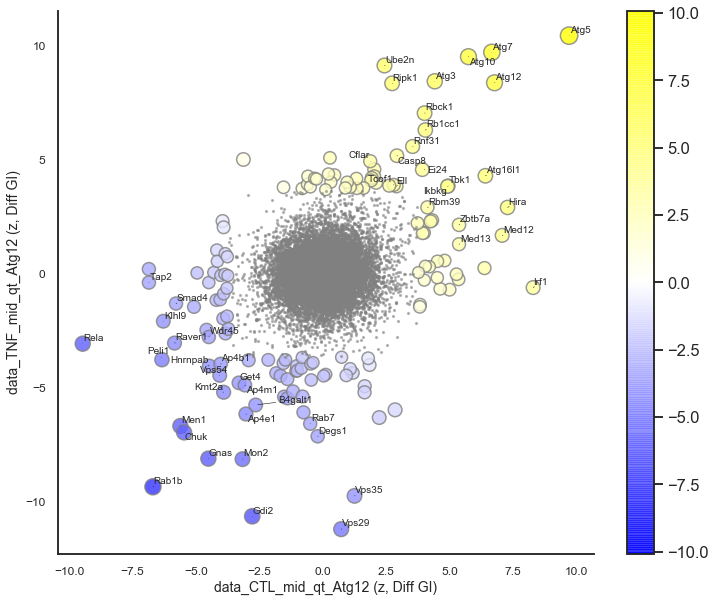

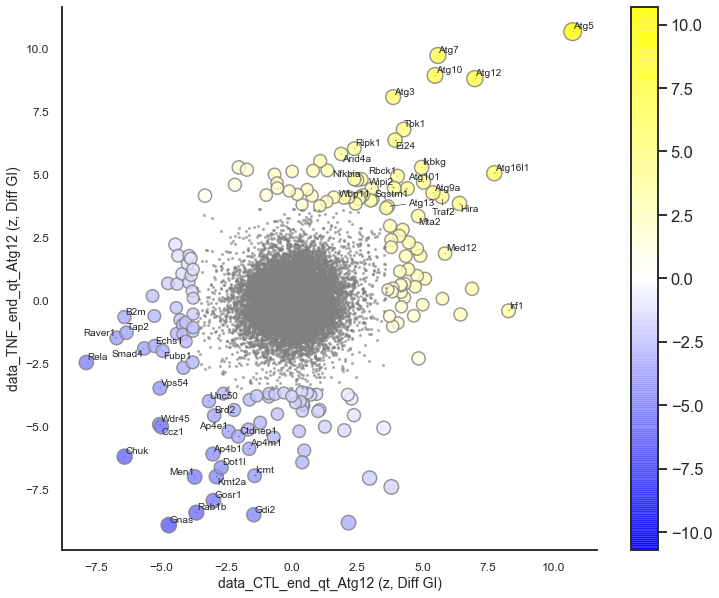

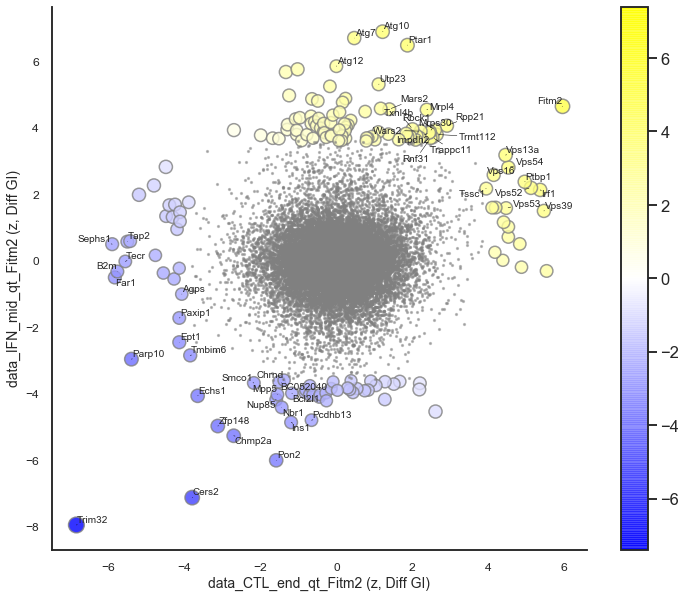

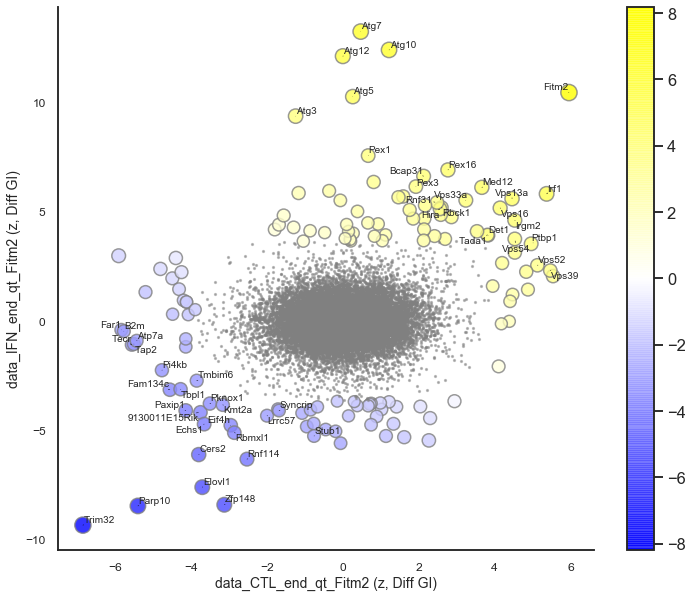

In [59]:
data_pairs = [("data_CTL_mid_qt_Atg12","data_TNF_mid_qt_Atg12"),
              ("data_CTL_end_qt_Atg12","data_TNF_end_qt_Atg12"),
              ("data_CTL_end_qt_Fitm2","data_IFN_mid_qt_Fitm2"),
              ("data_CTL_end_qt_Fitm2","data_IFN_end_qt_Fitm2")]

for c1,c2 in data_pairs:
    if 'Atg12' in c1:
        g='Atg12'
    else:
        g='Fitm2'
        
    mainkey = 'CTL_z'    
    submethod = c2.split("_")[1]
    subkey = f'{submethod}_z'
    fdr_thre=0.05
    temp = pd.DataFrame()
    temp[mainkey] = result_tables[c1]['z']
    temp[subkey] = result_tables[c2]['z']
    temp['CTL_fdr'] = result_tables[c1]['fdr']
    temp[f'{submethod}_fdr'] = result_tables[c2]['fdr']
    temp_min = temp[['CTL_fdr',f'{submethod}_fdr']].min(axis=1)
    temp_filtered = temp[temp_min<fdr_thre]
    temp_rest = temp[temp_min>=fdr_thre]

    figure(figsize=(12,10))

    scatter(temp_filtered[mainkey],temp_filtered[subkey],c=temp_filtered[[subkey,mainkey]].mean(axis=1),cmap=ywb,#'coolwarm',
            s=(abs(temp_filtered[[subkey,mainkey]]).mean(axis=1)+5)*20,
            #vmin=-(abs(temp['Exp_term']).max()*0.9),vmax=abs(temp['Exp_term']).max()*0.9
            vmin=-abs(temp_filtered[[subkey,mainkey]].mean(axis=1)).max(),vmax=abs(temp[[subkey,mainkey]].mean(axis=1)).max()
            ,alpha=0.8,edgecolors=matplotlib.colors.colorConverter.to_rgba('grey', alpha=.5))
    
    colorbar()
    scatter(temp_rest[mainkey],temp_rest[subkey],s=3,alpha=0.5,c='grey')

    number= 25
    texts=[]
    for sg in union1d(["Fitm2",'Atg12'],union1d(temp_filtered[[subkey,mainkey]].mean(axis=1).sort_values().head(number).index,temp_filtered[[subkey,mainkey]].mean(axis=1).sort_values().tail(number).index)):
        if sg in temp_filtered.index:
            x,y=(temp_filtered.loc[sg,mainkey],temp_filtered.loc[sg,subkey])
            if pd.isnull(x) or pd.isnull(y):
                continue
            texts.append(plt.text(x, y, sg))


    adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5),expand_text=(1.01, 1.05),size=14) 

    xticks(size=12)
    yticks(size=12)
    xlabel(f"{c1} (z, Diff GI)",size=14)
    ylabel(f'{c2} (z, Diff GI)',size=14)
    sns.despine()
    temp.to_csv(f"table_comparison_{c1}_{c2}.csv")
    savefig(f"Fig_{c1}_{c2}_yb.pdf",format="pdf")
    show()

# PCC vs GI

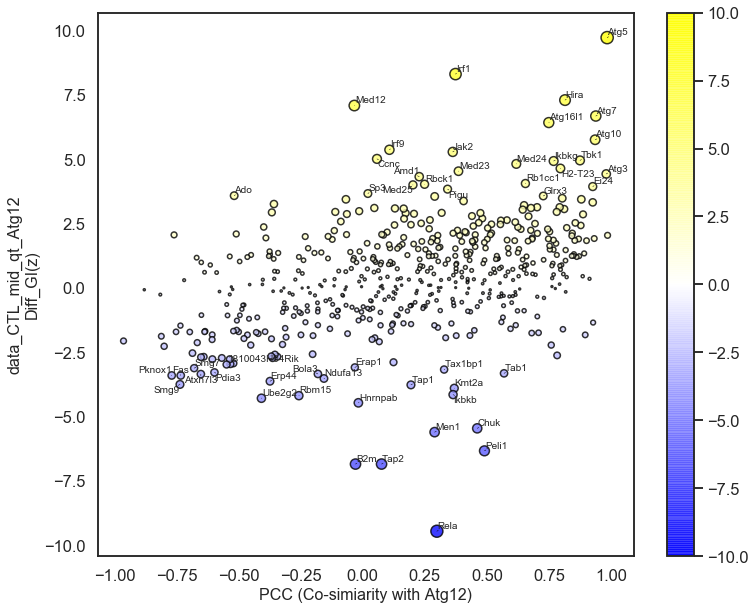

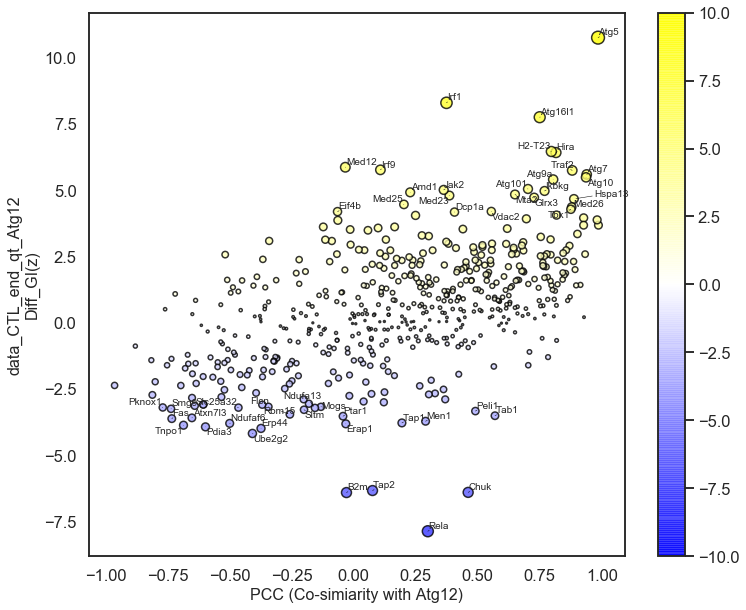

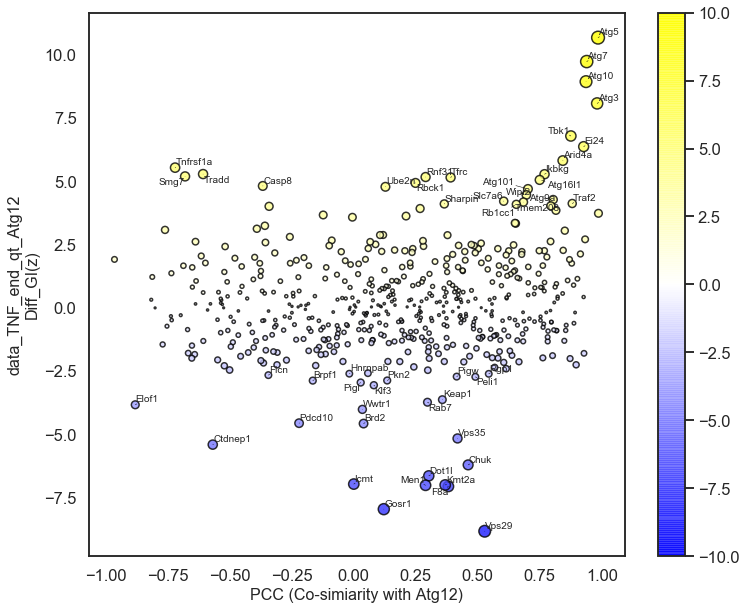

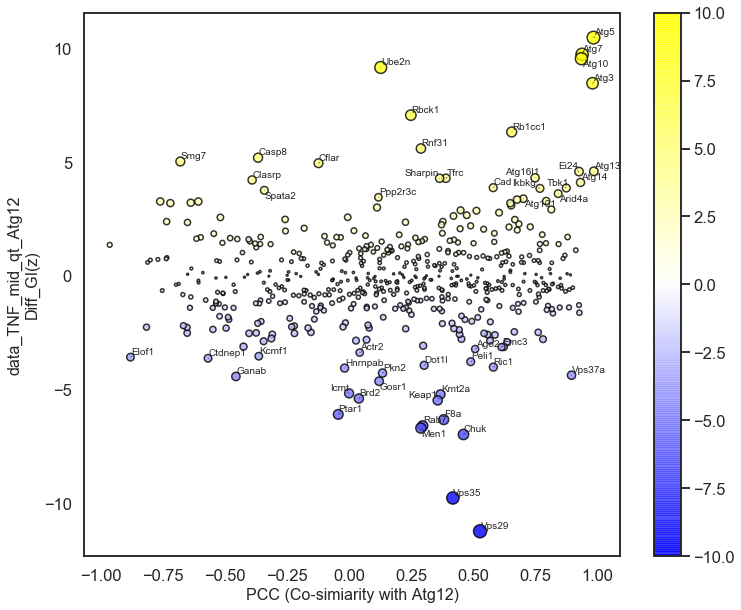

In [43]:

targetgene = 'Atg12'

# load pcc from cosimliarity network
pcclist = dict()
with open("drugz_corr_network_filtered_thre3.sorted",'r') as fp:
    for line in fp:
        linearray= line.rstrip().split("\t")
        g1=linearray[0]
        g2=linearray[1]
        flag=False
        
        if g1==targetgene:
            flag=True
            t = g2
        elif g2 == targetgene:
            flag=True
            t = g1
        
        if flag==True:
            pcc = float(linearray[2])
            pvalue = float(linearray[3])
            pcclist[t] = pcc
pcclist = pd.Series(pcclist)


# draw plots

for datakey in ['data_CTL_mid_qt_Atg12',  'data_CTL_end_qt_Atg12',  'data_TNF_end_qt_Atg12',  'data_TNF_mid_qt_Atg12']:
    
    temp2 = pd.DataFrame()
    temp2['PCC'] = pcclist
    temp2['GI(DrugZ)'] = result_tables[datakey][targetgene]
    temp2['Diff_GI(z)'] = result_tables[datakey]['z']
    temp2=temp2.dropna()

    figure(figsize=(12,10))
    scatter(temp2['PCC'],temp2['Diff_GI(z)'],c=temp2['Diff_GI(z)'],cmap=ywb,#'coolwarm',
            #vmin=-abs(temp2['Expression']).max(),vmax=abs(temp2['Expression']).max(),
            vmin = -10, vmax=10,
            edgecolors='k',alpha=0.8,
            s=temp2['Diff_GI(z)'].abs()*15+3
           )
    
    xlabel(f"PCC (Co-simiarity with {targetgene})",size=16)
    ylabel(f"{datakey}\nDiff_GI(z)",size=16)
    
    # gene annotation
    number=25 # maximum number of annotations
    texts=[]
    for sg in union1d(temp2['Diff_GI(z)'].sort_values().head(number).index,temp2['Diff_GI(z)'].sort_values().tail(number).index):
        x,y=(temp2.loc[sg,'PCC'],temp2.loc[sg,'Diff_GI(z)'])
        if pd.isnull(x) or pd.isnull(y):
            continue
        texts.append(plt.text(x, y, sg))

    adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5),expand_text=(1.01, 1.05)) 

    savefig(f"Fig_pcc_diffgi_{datakey}_yb.pdf",format='pdf')
    colorbar()
    show()




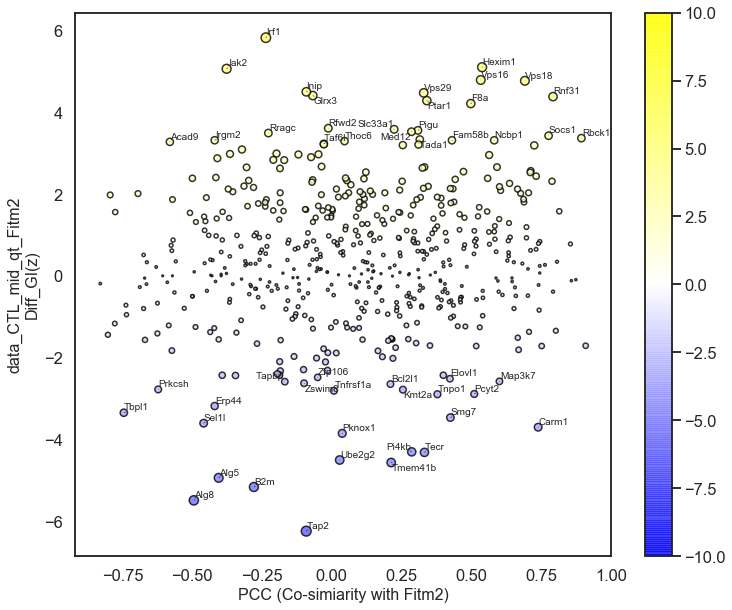

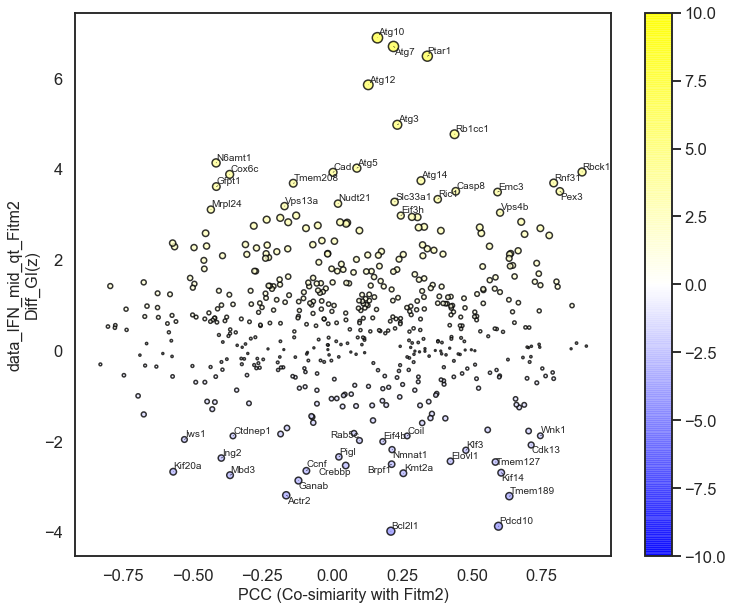

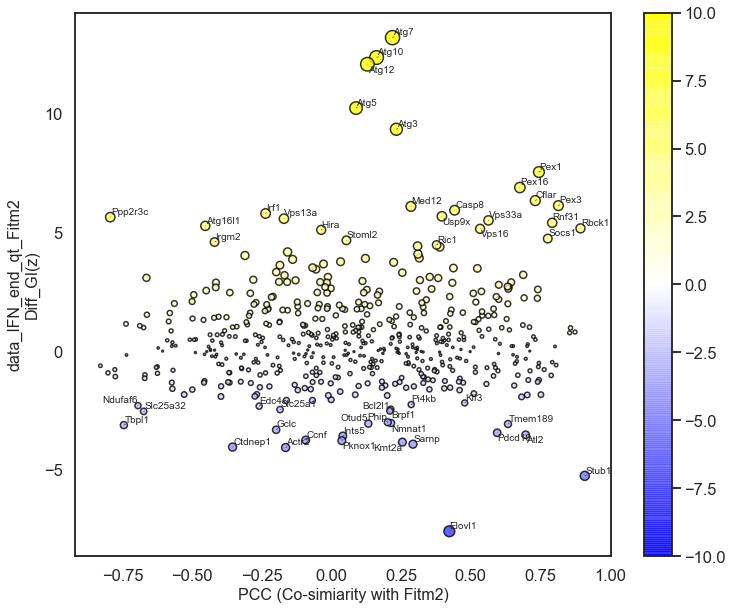

In [44]:
# NFkB function but differed from other nfkb members
# comparison cosimiliary vs GI score

targetgene = 'Fitm2'
# load pcc from cosimliarity network

pcclist = dict()
with open("drugz_corr_network_filtered_thre3.sorted",'r') as fp:
    for line in fp:
        linearray= line.rstrip().split("\t")
        g1=linearray[0]
        g2=linearray[1]
        flag=False
        
        if g1==targetgene:
            flag=True
            t = g2
        elif g2 == targetgene:
            flag=True
            t = g1
        
        if flag==True:
            pcc = float(linearray[2])
            pvalue = float(linearray[3])
            pcclist[t] = pcc
pcclist = pd.Series(pcclist)


for datakey in ['data_CTL_mid_qt_Fitm2', 'data_IFN_mid_qt_Fitm2', 'data_IFN_end_qt_Fitm2']:
    temp2 = pd.DataFrame()
    temp2['PCC'] = pcclist
    temp2['GI(DrugZ)'] = result_tables[datakey][targetgene]
    temp2['Diff_GI(z)'] = result_tables[datakey]['z']
    temp2=temp2.dropna()

    figure(figsize=(12,10))
    scatter(temp2['PCC'],temp2['Diff_GI(z)'],c=temp2['Diff_GI(z)'],cmap=ywb,#'coolwarm',
            #vmin=-abs(temp2['Expression']).max(),vmax=abs(temp2['Expression']).max(),
            vmin = -10, vmax=10,
            edgecolors='k',alpha=0.8,
            s=temp2['Diff_GI(z)'].abs()*15+3)
    
    xlabel(f"PCC (Co-simiarity with {targetgene})",size=16)
    ylabel(f"{datakey}\nDiff_GI(z)",size=16)
    #title(context)
    
    # gene annotation
    number=25 # maximum number of annotations
    
    texts=[]
    for sg in union1d(temp2['Diff_GI(z)'].sort_values().head(number).index,temp2['Diff_GI(z)'].sort_values().tail(number).index):
        x,y=(temp2.loc[sg,'PCC'],temp2.loc[sg,'Diff_GI(z)'])
        if pd.isnull(x) or pd.isnull(y):
            continue
        texts.append(plt.text(x, y, sg))
        

    adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5),expand_text=(1.01, 1.05)) 


    savefig(f"Fig_pcc_diffgi_{datakey}_yb.pdf",format='pdf')
    colorbar()
    #temp2.to_csv("table_pcc_diffgi_Atg12.csv")
    show()





# WT vs KO diffGI (plain)

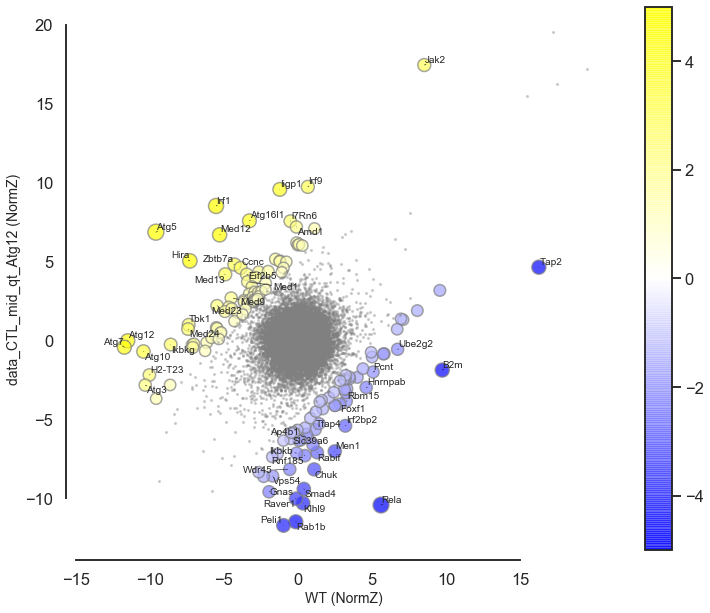

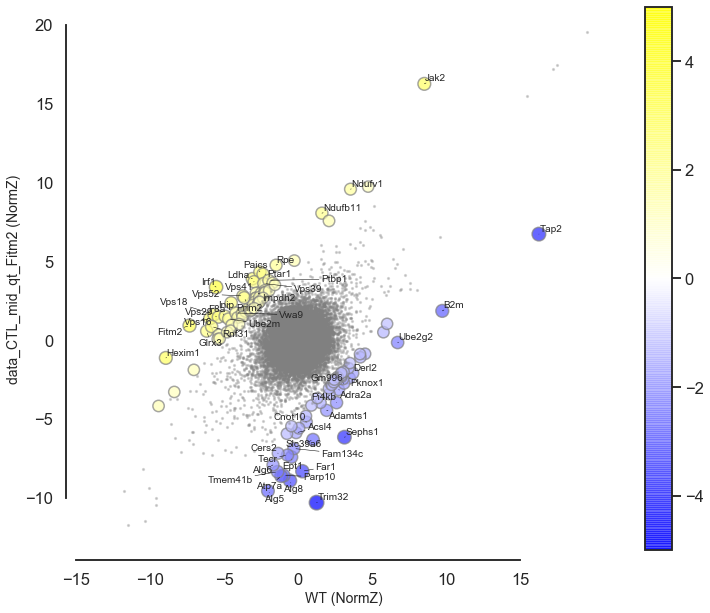

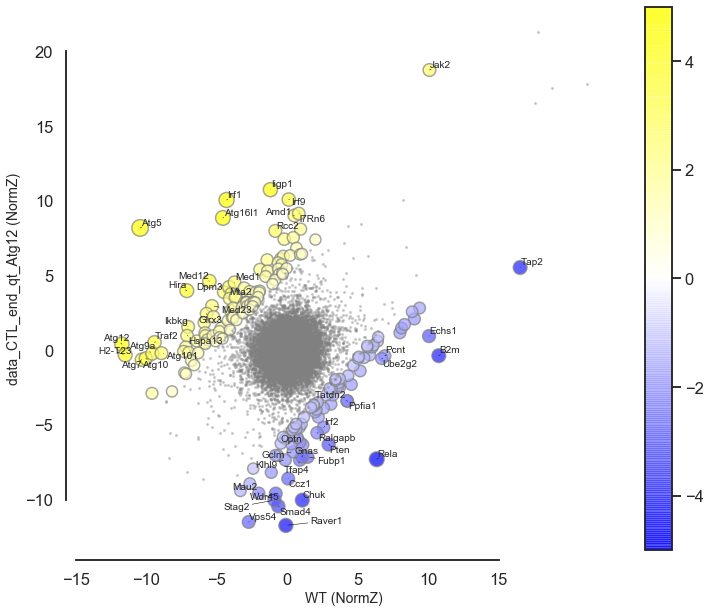

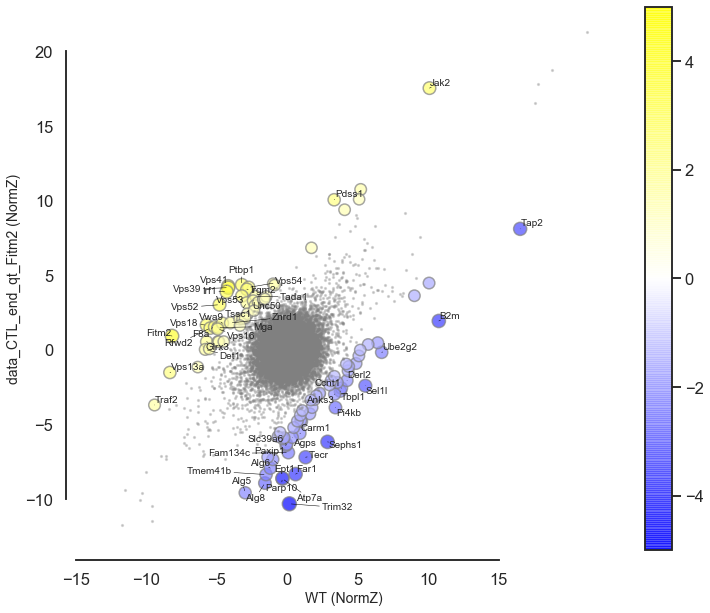

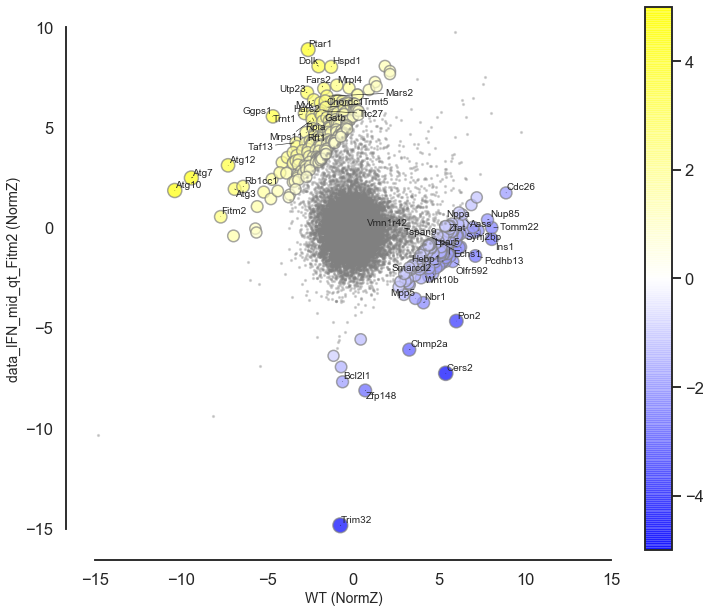

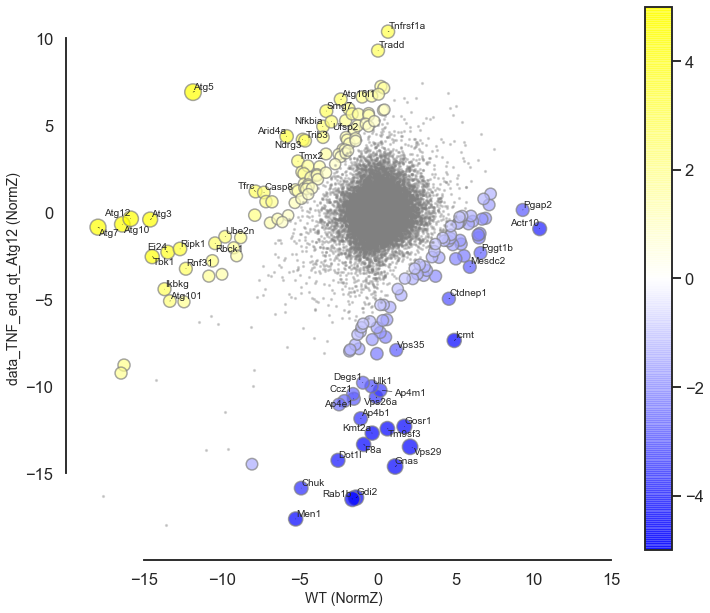

In [60]:
for datakey in list(result_tables.keys()):
    
    if 'Atg12' in result_tables[datakey].columns:
        g = 'Atg12'
    elif 'Fitm2' in result_tables[datakey].columns:
        g = 'Fitm2'
    else:
        continue
    tempdata = result_tables[datakey].copy()
    
    tempdata['temp'] =  pd.Series({i:max(0,abs(tempdata.loc[i,'z'])-2)*sign(tempdata.loc[i,'z']) for i in tempdata.index})
    
    

    figure(figsize=(12,10))

    tempdata_filtered = tempdata[tempdata['fdr']<0.2]
    tempdata_rest= tempdata[tempdata['fdr']>=0.2]
    
    scatter(tempdata_filtered['WT'],tempdata_filtered[g],c=tempdata_filtered['temp'],
            s=(tempdata_filtered['z'].abs()+3)*20+1,alpha=0.7,edgecolors='grey',
            cmap=ywb,vmin=-5,vmax=5
            #map='coolwarm',vmin=-10,vmax=10
            )
    colorbar()
    scatter(tempdata_rest['WT'],tempdata_rest[g],c='grey', s=3,alpha=0.3)
    anno_loc=[]
    texts=[]
    for sg in union1d(tempdata_filtered['z'].sort_values().head(25).index,tempdata_filtered['z'].sort_values().tail(25).index): #empha[g]:
        if sg not in tempdata.index:
            continue
        if sg not in tempdata_filtered.index:
            # draw point
            scatter(tempdata.loc[sg,'WT'],tempdata.loc[sg,g],s=abs(tempdata.loc[sg,'z'])*20+1,alpha=0.7,edgecolors='grey',color='white',marker='D')
        x,y=(tempdata.loc[sg,'WT'],tempdata.loc[sg,g])
        if pd.isnull(x) or pd.isnull(y):
            continue
        texts.append(plt.text(x, y, sg))

    adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5),expand_text=(1.01, 1.05))    
    

    xticks(range(-15,20,5),size=12)
    yticks(size=12)
    xlabel("WT (NormZ)",size=14)
    ylabel(f"{datakey} (NormZ)",size=14)
    #xlim(-19,19)
    #ylim(-19,19)
    sns.despine(offset=10, trim=True)
    savefig(f"Fig_diffGI_{datakey}_sl_buff.pdf",format="pdf")
    tempdata[['WT',g,'diff','z','pvalue','fdr']].sort_values("z").to_csv(f"result_table_diffGI_{datakey}_pvalue_fdr.csv")
    show()

# proliferation GI


In [61]:
# GI

# WT
fc_wt = pd.read_csv("MUS003_Renca-HA_mTKO-20181003-readcounts.foldchange",index_col=0,header=0,sep="\t")
fc_Fitm2 = pd.read_csv("MGIN008_Renca-HA_Fitm2-20191212-readcounts.foldchange",index_col=0,header=0,sep="\t")
fc_Atg12 = pd.read_csv("MGIN009_Renca-HA_Atg12_-_20200113_-_readcounts.foldchange",index_col=0,header=0,sep="\t")

#Tcell- condition

fc_wt_mid_mean = fc_wt.groupby(fc_wt['GENE']).mean()["MUS_25,MUS_26,MUS_27".split(",")].mean(axis=1)#[common]
fc_Fitm2_mid_mean = fc_Fitm2.groupby(fc_Fitm2['GENE']).mean()["MGIN_83,MGIN_84,MGIN_85".split(",")].mean(axis=1)#[common]
fc_Atg12_mid_mean = fc_Atg12.groupby(fc_Atg12['GENE']).mean()["MGIN_90,MGIN_91,MGIN_92".split(",")].mean(axis=1)#[common]

#Tcell- condition

fc_wt_end_mean = fc_wt.groupby(fc_wt['GENE']).mean()["MUS_19,MUS_20,MUS_21".split(",")].mean(axis=1)#[common]
fc_Fitm2_end_mean = fc_Fitm2.groupby(fc_Fitm2['GENE']).mean()["MGIN_83,MGIN_84,MGIN_85".split(",")].mean(axis=1)#[common]
fc_Atg12_end_mean = fc_Atg12.groupby(fc_Atg12['GENE']).mean()["MGIN_93,MGIN_94,MGIN_95".split(",")].mean(axis=1)#[common]


In [62]:
# mid time point

data_fc = pd.DataFrame(index=common)
data_fc['WT'] = fc_wt_mid_mean
data_fc['Fitm2'] = fc_Fitm2_mid_mean
data_fc['Atg12'] = fc_Atg12_mid_mean


In [63]:
data_fc.head(3)

WT     Fitm2     Atg12
0610007P14Rik  0.149800  0.263067  0.156133
0610009B22Rik  0.059067  0.053333  0.286800
0610009L18Rik -0.079467  0.129067 -0.086133

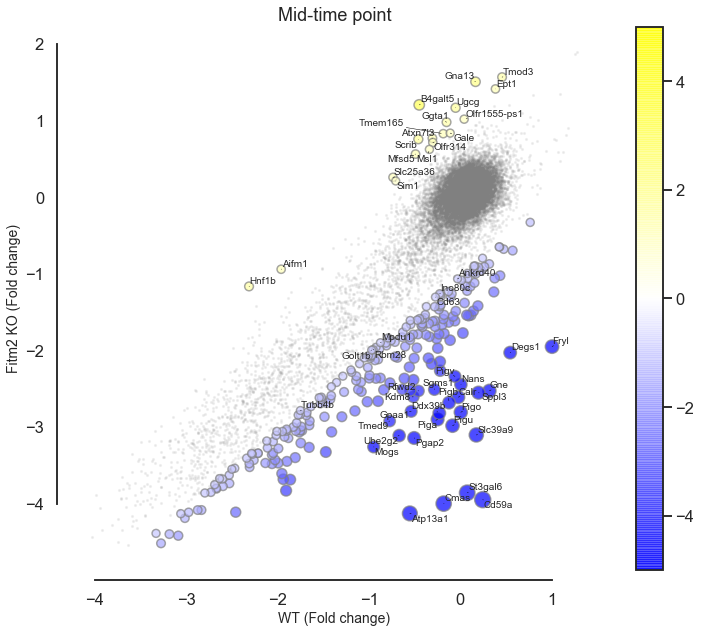

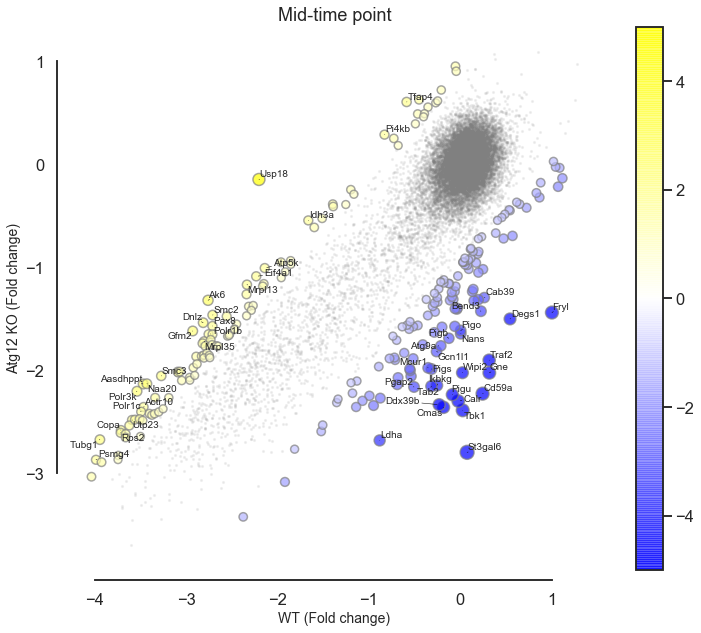

In [64]:
# proliferation mid time point

for g in ['Fitm2','Atg12']:
    
    # Proliferation calculation (using FC instead of NormZ score)
    result = calc_gi_zscore_dataframe(data_fc,g)
    
    result['color'] = pd.Series({i:max(0,abs(result.loc[i,'z'])-2)*sign(result.loc[i,'z']) for i in result.index})
    
    figure(figsize=(12,10))

    tempdata_filtered = result[result['fdr']<0.2]
    tempdata_rest = result[result['fdr']>=0.2]

    scatter(tempdata_filtered['WT'],tempdata_filtered[g],c=tempdata_filtered['color'],
            s=tempdata_filtered['z'].abs()*20+1,alpha=0.7,edgecolors='grey',
            cmap=ywb,vmin=-5,vmax=5
            #map='coolwarm',vmin=-10,vmax=10
            )
    colorbar()
    scatter(tempdata_rest['WT'],tempdata_rest[g],alpha=0.1,c='grey',s=3
            
            )
    
    anno_loc=[]
    texts=[]
    for sg in union1d(tempdata_filtered['z'].sort_values().head(25).index,tempdata_filtered['z'].sort_values().tail(25).index): #empha[g]:
        if sg not in data_fc.index:
            continue
        if sg not in tempdata_filtered.index:
            # for non sig but in empha
            scatter(data_fc.loc[sg,'WT'],data_fc.loc[sg,g],s=abs(data_fc.loc[sg,'z'])*20+1,alpha=0.7,edgecolors='grey',color='white',marker='D')
        x,y=(data_fc.loc[sg,'WT'],data_fc.loc[sg,g])
        if pd.isnull(x) or pd.isnull(y):
            continue
        texts.append(plt.text(x, y, sg))
        #annotate(sg,xy=(x,y),xytext =(x+addx,y+addy),arrowprops=dict(arrowstyle="-",color='k'))

    adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5),expand_text=(1.01, 1.05))    
    
    
    #xticks(size=12)
    #yticks(size=12)
    xlabel("WT (Fold change)",size=14)
    ylabel(f"{g} KO (Fold change)",size=14)
    title("Mid-time point")
    sns.despine(offset=10, trim=True)
    savefig(f"Fig_proliferation_{g}_mid.pdf",format="pdf")
    show()
    result[['WT',g,'diff','z','pvalue','fdr']].sort_values("z").to_csv(f"result_table_GI_Proliferation_{g}_KO_mid_pvalue_fdr.csv")
    


    

In [65]:
# end time point

data_fc = pd.DataFrame(index=common)
data_fc['WT'] = fc_wt_end_mean
data_fc['Fitm2'] = fc_Fitm2_end_mean
data_fc['Atg12'] = fc_Atg12_end_mean


In [66]:
data_fc.head(3)

WT     Fitm2     Atg12
0610007P14Rik  0.026800  0.263067  0.219800
0610009B22Rik  0.043067  0.053333  0.324333
0610009L18Rik -0.286267  0.129067 -0.063667

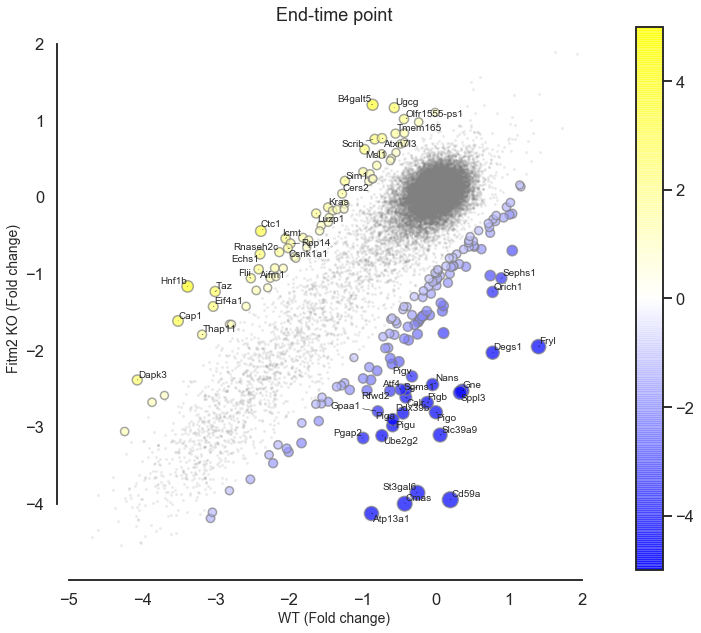

In [67]:

# proliferation mid time point
for g in ['Fitm2','Atg12']:
    
    # Proliferation calculation (using FC instead of NormZ score)
    result = calc_gi_zscore_dataframe(data_fc,g)
    
    result['color'] = pd.Series({i:max(0,abs(result.loc[i,'z'])-2)*sign(result.loc[i,'z']) for i in result.index})
    
    figure(figsize=(12,10))

    tempdata_filtered = result[result['fdr']<0.2]
    tempdata_rest = result[result['fdr']>=0.2]

    scatter(tempdata_filtered['WT'],tempdata_filtered[g],c=tempdata_filtered['color'],
            s=tempdata_filtered['z'].abs()*20+1,alpha=0.7,edgecolors='grey',
            cmap=ywb,vmin=-5,vmax=5
            #map='coolwarm',vmin=-10,vmax=10
            )
    colorbar()
    scatter(tempdata_rest['WT'],tempdata_rest[g],alpha=0.1,c='grey',s=3
            
            )
    
    anno_loc=[]
    texts=[]
    for sg in union1d(tempdata_filtered['z'].sort_values().head(25).index,tempdata_filtered['z'].sort_values().tail(25).index): #empha[g]:
        if sg not in data_fc.index:
            continue
        if sg not in tempdata_filtered.index:
            # for non sig but in empha
            scatter(data_fc.loc[sg,'WT'],data_fc.loc[sg,g],s=abs(data_fc.loc[sg,'z'])*20+1,alpha=0.7,edgecolors='grey',color='white',marker='D')
        x,y=(data_fc.loc[sg,'WT'],data_fc.loc[sg,g])
        if pd.isnull(x) or pd.isnull(y):
            continue
        texts.append(plt.text(x, y, sg))
        #annotate(sg,xy=(x,y),xytext =(x+addx,y+addy),arrowprops=dict(arrowstyle="-",color='k'))

    adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5),expand_text=(1.01, 1.05))    
    
    
    xticks(size=12)
    yticks(size=12)
    xlabel("WT (Fold change)",size=14)
    ylabel(f"{g} KO (Fold change)",size=14)
    title("End-time point")
    sns.despine(offset=10, trim=True)
    savefig(f"Fig_proliferation_{g}_end.pdf",format="pdf")
    show()
    result[['WT',g,'diff','z','pvalue','fdr']].sort_values("z").to_csv(f"result_table_GI_Proliferation_{g}_KO_end_pvalue_fdr.csv")
    



# non-HA

In [68]:
# GI  Renca -nonHA
# WT
fc_wt = pd.read_csv("MUS017_Renca_Cas9_Cytokines_-_20200320_-_readcounts.foldchange",index_col=0,header=0,sep="\t")
fc_Atg12= pd.read_csv("MGIN005_Renca_Atg12_-_20190619_-_readcounts.foldchange",index_col=0,header=0,sep="\t")
fc_Fitm2 = pd.read_csv("MGIN006_Renca_Fitm2_-_20190619_-_readcounts.foldchange",index_col=0,header=0,sep="\t")

#KO

fc_wt_mid_mean = fc_wt.groupby(fc_wt['GENE']).mean()["MUS_233,MUS_234,MUS_235".split(",")].mean(axis=1)#[common]
fc_Fitm2_mid_mean = fc_Fitm2.groupby(fc_Fitm2['GENE']).mean()["MGIN_57,MGIN_58,MGIN_59".split(",")].mean(axis=1)#[common]
fc_Atg12_mid_mean = fc_Atg12.groupby(fc_Atg12['GENE']).mean()["MGIN_44,MGIN_45,MGIN_46".split(",")].mean(axis=1)#[common]

#KO end

fc_wt_end_mean = fc_wt.groupby(fc_wt['GENE']).mean()["MUS_236,MUS_237,MUS_238".split(",")].mean(axis=1)#[common]
fc_Fitm2_end_mean = fc_Fitm2.groupby(fc_Fitm2['GENE']).mean()["MGIN_60,MGIN_61,MGIN_62".split(",")].mean(axis=1)#[common]
fc_Atg12_end_mean = fc_Atg12.groupby(fc_Atg12['GENE']).mean()["MGIN_50,MGIN_51,MGIN_52".split(",")].mean(axis=1)#[common]




In [69]:
data_fc = pd.DataFrame(index=common)
data_fc['WT'] = fc_wt_mid_mean
data_fc['Fitm2'] = fc_Fitm2_mid_mean
data_fc['Atg12'] = fc_Atg12_mid_mean


In [70]:
data_fc.head(3)

WT     Fitm2     Atg12
0610007P14Rik -0.009400  0.079933  0.042800
0610009B22Rik  0.025333  0.010267  0.071333
0610009L18Rik -0.070000  0.153933  0.192267

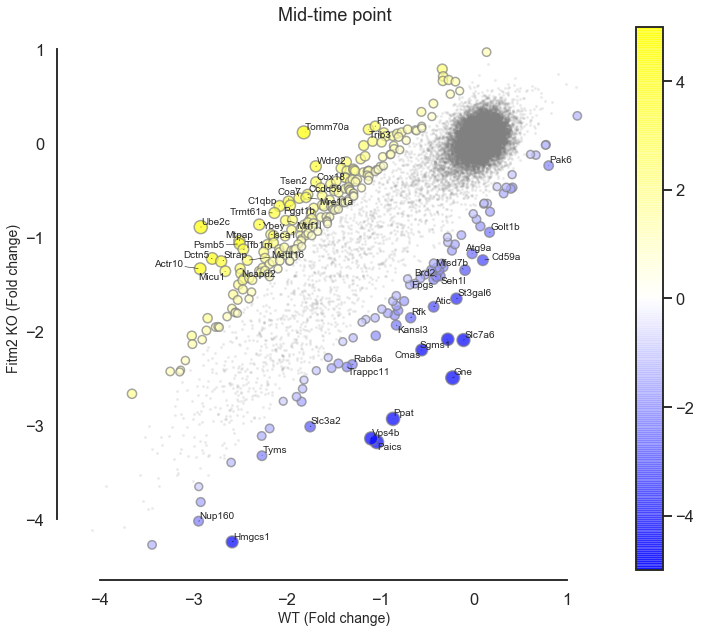

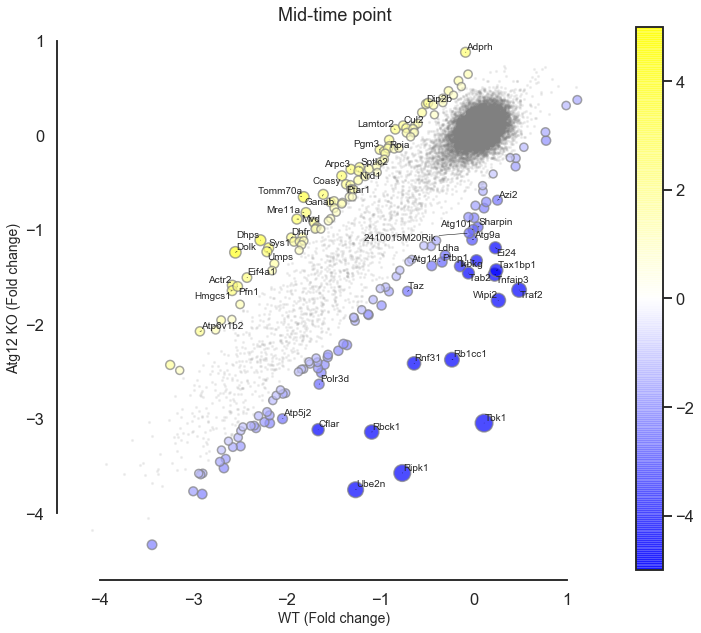

In [71]:
for g in ['Fitm2','Atg12']:
    
    # Proliferation calculation (using FC instead of NormZ score)
    result = calc_gi_zscore_dataframe(data_fc,g)
    
    result['color'] = pd.Series({i:max(0,abs(result.loc[i,'z'])-2)*sign(result.loc[i,'z']) for i in result.index})
    
    # draw plot
    figure(figsize=(12,10))

    tempdata_filtered = result[result['fdr']<0.2]
    tempdata_rest = result[result['fdr']>=0.2]

    scatter(tempdata_filtered['WT'],tempdata_filtered[g],c=tempdata_filtered['color'],
            s=tempdata_filtered['z'].abs()*20+1,alpha=0.7,edgecolors='grey',
            cmap=ywb,vmin=-5,vmax=5
            #map='coolwarm',vmin=-10,vmax=10
            )
    colorbar()
    scatter(tempdata_rest['WT'],tempdata_rest[g],alpha=0.1,c='grey',s=3
            
            )
    
    anno_loc=[]
    texts=[]
    for sg in union1d(tempdata_filtered['z'].sort_values().head(25).index,tempdata_filtered['z'].sort_values().tail(25).index): #empha[g]:
        if sg not in data_fc.index:
            continue
        if sg not in tempdata_filtered.index:
            # for non sig but in empha
            scatter(data_fc.loc[sg,'WT'],data_fc.loc[sg,g],s=abs(data_fc.loc[sg,'z'])*20+1,alpha=0.7,edgecolors='grey',color='white',marker='D')
        x,y=(data_fc.loc[sg,'WT'],data_fc.loc[sg,g])
        if pd.isnull(x) or pd.isnull(y):
            continue
        texts.append(plt.text(x, y, sg))
        #annotate(sg,xy=(x,y),xytext =(x+addx,y+addy),arrowprops=dict(arrowstyle="-",color='k'))

    adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5),expand_text=(1.01, 1.05))    
    
    
    xticks(size=12)
    yticks(size=12)
    xlabel("WT (Fold change)",size=14)
    ylabel(f"{g} KO (Fold change)",size=14)
    title("Mid-time point")
    sns.despine(offset=10, trim=True)
    savefig(f"Fig_proliferation_Renca_nonHA_{g}_mid.pdf",format="pdf")
    show()
    result[['WT',g,'diff','z','pvalue','fdr']].sort_values("z").to_csv(f"result_table_GI_Renca_nonHA_Proliferation_{g}_KO_mid_pvalue_fdr.csv")
    



In [72]:
data_fc = pd.DataFrame(index=common)
data_fc['WT'] = fc_wt_end_mean
data_fc['Fitm2'] = fc_Fitm2_end_mean
data_fc['Atg12'] = fc_Atg12_end_mean



In [73]:
for g in ['Fitm2','Atg12']:
    
    # Proliferation calculation (using FC instead of NormZ score)
    result = calc_gi_zscore_dataframe(data_fc,g)
    
    result['color'] = pd.Series({i:max(0,abs(result.loc[i,'z'])-2)*sign(result.loc[i,'z']) for i in result.index})
    
    # draw plot
    figure(figsize=(12,10))

    tempdata_filtered = result[result['fdr']<0.2]
    tempdata_rest = result[result['fdr']>=0.2]

    scatter(tempdata_filtered['WT'],tempdata_filtered[g],c=tempdata_filtered['color'],
            s=tempdata_filtered['z'].abs()*20+1,alpha=0.7,edgecolors='grey',
            cmap=ywb,vmin=-5,vmax=5
            #map='coolwarm',vmin=-10,vmax=10
            )
    colorbar()
    scatter(tempdata_rest['WT'],tempdata_rest[g],alpha=0.1,c='grey',s=3
            
            )
    
    anno_loc=[]
    texts=[]
    for sg in union1d(tempdata_filtered['z'].sort_values().head(25).index,tempdata_filtered['z'].sort_values().tail(25).index): #empha[g]:
        if sg not in data_fc.index:
            continue
        if sg not in tempdata_filtered.index:
            # for non sig but in empha
            scatter(data_fc.loc[sg,'WT'],data_fc.loc[sg,g],s=abs(data_fc.loc[sg,'z'])*20+1,alpha=0.7,edgecolors='grey',color='white',marker='D')
        x,y=(data_fc.loc[sg,'WT'],data_fc.loc[sg,g])
        if pd.isnull(x) or pd.isnull(y):
            continue
        texts.append(plt.text(x, y, sg))
        #annotate(sg,xy=(x,y),xytext =(x+addx,y+addy),arrowprops=dict(arrowstyle="-",color='k'))

    adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5),expand_text=(1.01, 1.05))    
    
    
    xticks(size=12)
    yticks(size=12)
    xlabel("WT (Fold change)",size=14)
    ylabel(f"{g} KO (Fold change)",size=14)
    title("End-time point")
    sns.despine(offset=10, trim=True)
    savefig(f"Fig_proliferation_Renca_nonHA_{g}_end.pdf",format="pdf")
    show()
    result[['WT',g,'diff','z','pvalue','fdr']].sort_values("z").to_csv(f"result_table_GI_Renca_nonHA_Proliferation_{g}_KO_end_pvalue_fdr.csv")
    



In [74]:
# writing drugz data
with pd.ExcelWriter('drugz_all.xlsx') as writer:


    for file in glob.glob('drugz*'):
        if "mid" in file or "end" in file:
            print(file)
            temp = pd.read_csv(file,sep="\t",index_col=0)
            temp.to_excel(writer,sheet_name=file.replace("drugz_",""))
            

drugz_MUS017_Renca_IFN_mid
drugz_MUS017_Renca_IFN_end
drugz_MUS017_Renca_TNF_mid
drugz_MUS003_Renca_mid
drugz_MUS003_Renca_end
drugz_MGIN009_Atg12_mid
drugz_MGIN009_Atg12_end
drugz_MGIN008_Fitm2_mid
drugz_MGIN006_Renca_Fitm2_IFN_mid
drugz_MGIN006_Renca_Fitm2_IFN_end
drugz_MUS017_Renca_TNF_end
drugz_MGIN005_Renca_Atg12_TNF_mid
drugz_MGIN005_Renca_Atg12_TNF_end
